### **Question 2**

We import the required modules and load in the dataset.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/daily_data.csv')   # Loading the dataset

This function returns the data.close value for a given date as input.

In [29]:
# Returns the close value for the given date
def get_buying_price(date):
  for i in df.index:
    if date == df.datetime[i]:
      return df.close[i]
  return -1

Now we have the main computational function which performs the entire trade.

In [30]:
# Taking input of the Stop Loss and Take Profit percentages
sl = float(input("Enter the Stop Loss: "))
tp = float(input("Enter the Take Profit: "))

net = 0 # Stores the net income of the trade
buy, sell = [], []  # Stores the byuing and selling lists
state = "Buy"   # Stores the current state - Buy or Sell
income = []
for i in range(len(df)):
  # If we want to buy on a day
  if state == "Buy":
      buy.append(df.datetime[i])
      state = "Sell"
      # Set the stop loss and take profit for the next trade
      stop_loss = df.close[i] - sl * df.close[i]
      take_profit = df.close[i] + tp * df.close[i]


  # If we want to sell on a day
  if state == "Sell":
    if(df.close[i] >= take_profit):  # Square off trade to secure profit
      p = df.close[i] - get_buying_price(buy[len(buy) - 1])  # get_buying_price(buy[len(buy) - 1]) is the buying price of the stock
      income.append(p)
      sell.append(df.datetime[i]) # Appending that date to datetime
      state = "Buy"   # Changing state to buy

    elif(df.close[i] <= stop_loss):  # Square off trade to limit loss
      l = get_buying_price(buy[len(buy) - 1]) - df.close[i]
      income.append(-l)
      sell.append(df.datetime[i]) # Appending that date to datetime
      state = "Buy" # Changing state to buy

    elif i == (len(df) - 1):  # Last Day, we sell the stock at that price only
      sell.append(df.datetime[i]) # Appending that date to datetime
      k = df.close[i] - get_buying_price(buy[len(buy) - 1])
      income.append(k)

    else:
        continue  # No trading on that day

Enter the Stop Loss: 0.02
Enter the Take Profit: 0.06


Displaying the Data Frame

In [31]:
print("Net income: ", np.sum(income))
data = pd.DataFrame({
    "Buy_Date" : buy,
    "Sell_Date" : sell,
    "Income_On_Trade" : income
})
data

Net income:  11571.340000000057


,Buy_Date,Sell_Date,Income_On_Trade
0,2018-01-01,2018-01-02,1445.00
1,2018-01-03,2018-01-05,1829.03
2,2018-01-06,2018-01-07,-750.64
3,2018-01-08,2018-01-10,-351.68
4,2018-01-11,2018-01-14,-396.50
...,...,...,...
311,2021-12-27,2021-12-28,-3897.98
312,2021-12-29,2022-01-03,-1058.74
313,2022-01-04,2022-01-06,-2380.96
314,2022-01-07,2022-01-08,-1027.82


Plotting a Graph for the trade

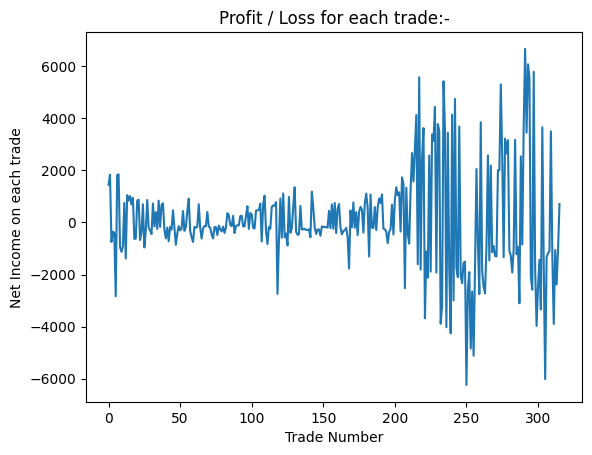

In [32]:
plt.plot(income)
plt.title("Profit / Loss for each trade:-")
plt.xlabel("Trade Number")
plt.ylabel("Net Income on each trade")
plt.show()